In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('log2.csv')
data.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [3]:
data.shape

(65532, 12)

In [4]:
data.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [5]:
data.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Action                  object
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
dtype: object

In [6]:
data['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

# KNN

Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(data.drop('Action',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scaler.transform(data.drop('Action',axis=1))

Data train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['Action'],
                                                    test_size=0.30,random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test,pred))

[[11324    13     0     0]
 [    7  4356    19     4]
 [    0     7  3918     0]
 [    1     7     0     4]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11337
        deny       0.99      0.99      0.99      4386
        drop       1.00      1.00      1.00      3925
  reset-both       0.50      0.33      0.40        12

    accuracy                           1.00     19660
   macro avg       0.87      0.83      0.85     19660
weighted avg       1.00      1.00      1.00     19660



Finding the value of k, where error rate is minimum

In [23]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

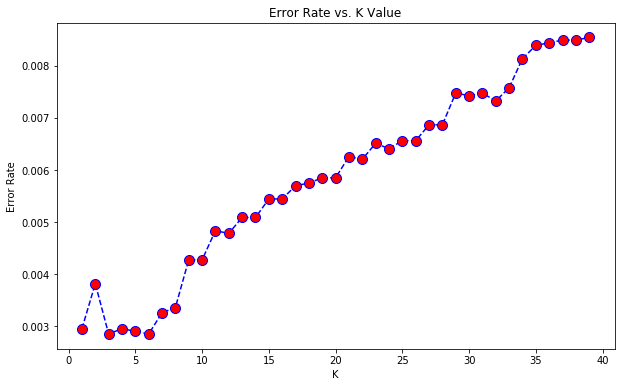

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)

In [26]:
print(confusion_matrix(y_test,pred))

[[11324    13     0     0]
 [    7  4356    19     4]
 [    0     7  3918     0]
 [    1     7     0     4]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11337
        deny       0.99      0.99      0.99      4386
        drop       1.00      1.00      1.00      3925
  reset-both       0.50      0.33      0.40        12

    accuracy                           1.00     19660
   macro avg       0.87      0.83      0.85     19660
weighted avg       1.00      1.00      1.00     19660

